# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
# выполним импорт библиотек
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем файл real_estate_data.csv и сохраним его в переменной data.

In [2]:
data = pd.read_csv('/Users/nikitapusilin/Desktop/Проекты/Исследование объявлений о продаже квартир/real_estate_data.csv'
                   ,sep = '\t')

Получим общую информацию о данных и выведем таблицу на экран

In [3]:
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим, есть ли пропуски в данных

In [4]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, тип данных у каждого столбца - bool,object float64.

Подробно разберём, какие в data столбцы и какую информацию они содержат:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- localityname — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

В столбце `ceiling_height` обнаружено - 9195 пропусков, `living_area` - 1903,`kitchen_area` -  2278, `balcony` - 11519, `locality_name` - 49, `airports_nearest` - 5542, `cityCenters_nearest` - 5519, `parks_around3000` 5518, `parks_nearest` 15620, `ponds_around3000` 5518,`ponds_nearest` 14589, `days_exposition` 3181. 
В столбце `is_apartment` 20924 пропущенных значений.

Возможные причины пропусков: 
* человеческий фактор
* в случае `ceiling_height`, продавец может думать, что высота потолков у всех одинаковая и не заполнить данное поле
* пропуски в `living_area` - ошибка
* `kitchen_area` кухня может быть совмещена с жилой комнатой
* `balcony` -  нет балкона
* `airports_nearest`, `cityCenters_nearest`, `parks_around 3000`,`parks_nearest`,`ponds_around3000`
`ponds_nearest` продавец мог не знать эту информацию
* `days_exposition` - ошибка </b></font>

## Предобработка данных
Исключим пропуски, в столбце `ceiling_height` обнаружили аномально большие значения для потолков, было принято решение поделить значения больше 20 на 10. А так же заполним пропуски в `ceiling_height` медианными значениями

In [5]:
for i in range(len(data['ceiling_height'])):#все аномальные значения ceiling_height(>=20) делим на 10
    if data['ceiling_height'][i] >= 20:
        data['ceiling_height'][i] = data['ceiling_height'][i] / 10   
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())#заполняе пропуски в ceiling_height медианными значениями
for i in range(len(data['ceiling_height'])):#все аномальные значения ceiling_height(<=2.5) приравниваем к медиане
    if data['ceiling_height'][i] <= 2.5:
        data['ceiling_height'][i] = data['ceiling_height'].median()
    elif data['ceiling_height'][i] >= 9:
        data['ceiling_height'][i] = data['ceiling_height'].median()  



data['is_apartment'] = data['is_apartment'].fillna(False)#Заменяем пропуски в столбце is_apartment
data['parks_around3000'] = data['parks_around3000'].fillna(0)#Заменяем пропуски в столбце parks_around 3000
data['parks_nearest'] = data['parks_nearest'].fillna(0)#Заменяем пропуски в столбце parks_nearest
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)#Заменяем пропуски в столбце ponds_nearest
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)#Заменяем пропуски в столбце ponds_around3000
data['balcony'] = data['balcony'].fillna(0)#Заменяем пропуски в столбце balcony
data['floors_total'] = data['floors_total'].fillna(data['floor'])#Заменим пропущенные значения floors_total на значение их столбца floor

data[['last_price', 'floors_total', 'balcony','last_price']] = data[['last_price', 'floors_total', 'balcony','last_price']].astype('int')#Заменяем float64 на int64 в следующих столбцах

data['rooms'] = data['rooms'].replace(0, np.nan)#Заменяем 0 на nan в столбце rooms
data.dropna(subset=['rooms'], inplace=True)#удаляем строки с nan из столбца rooms
data['rooms'] = data['rooms'].astype(int)#заменили тип данных в rooms


В столбце `ceiling_height` поделили значения больше 20 на 10, данные кажутся неправдоподными, возможно это ошибка и точка поставлена не правильно. Значения больше 9 и меньше 2.5 прировняли к медиане по столбцу по той же причине. 
В столбце `is_apartment` все пропуски заменяем на False - все продавцы у которых апартаменты, поставили True.
В столбцах `parks_around3000`, `parks_nearest`, `ponds_nearest`, `ponds_around3000` заменяем пропуски 0, человек мог не знать точное расстояние до аэропорта, парков и т.д. А парков и аэропортов может и не быть в радиусе 3 км.
Все пропуски в столбце `balcony` заменяем 0, будем считать, если значение не указано - балконов в квартире нету.
В столбце `floors_total` мы переводим все объявления с пропускуми в катагорию "этаж последний", а потом пытаемся исследовать этот параметр. Заменили тип данных в `rooms` для удобства анализа. В ходе исследования так же были обнаружены 197 `0-ыx значений` в столбце `rooms`, удалим их.



In [6]:
data['living_area'] = data['living_area'].fillna(data.groupby(['locality_name'])['living_area'].transform('median')) 
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['locality_name'])['kitchen_area'].transform('median'))
data['days_exposition'] = data['days_exposition'].fillna(data.groupby(['locality_name'])['days_exposition'].transform('median'))
data.dropna(subset = ['kitchen_area','living_area','days_exposition'], inplace=True) # удалим значения
data = data.reset_index(drop=True)# восстановим индексы
display(data.head()) # проверим таблицу



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,96.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,31.42,9,False,...,9.9,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски в `living_area` мы заменим медианной сгруппированной по населенному пункту. После замены у нас осталось 21 пустое значение. Это связано с отсутствием населенного пункта, либо с тем что есть населенный пункт, но там продается одна квартира со значением `NaN` в living_area. Предлагается удалить эти строки. Аналогичное проделаем с пропусками в столбце `kitchen_area`.
Пропуски в столбце `days_exposition` можно так же заменить медианной по населенному пункту, по сколько таким образом мы выясним, сколько дней продается квартира в каждом населенном пункте.

## Расчёты и добавление результатов в таблицу
Добавим в таблицу цену одного квадратного метра. День недели,месяц и год публикации. Этаж квартиры - первый,последний,другой.
Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [7]:
data['square_price'] = data['last_price'] / data['total_area'] #считаем цену квадратного метра
print('Средняя цена одного квадратного метра:', 
        round(data['square_price'].mean()),
      'Медианная цена одного квадратного метра',
        round(data['square_price'].median())) #смотрим среднюю и медиану
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M') #меняет формат на даты на удобный для чтения
data['weekday'] = data['first_day_exposition'].dt.weekday #переноси день из столбца 'first_day_exposition'
def dict_weekday(day): #функция для распределния дня недели
    if day == 0:
        return 'понедельник'
    if day == 1:
        return 'вторник'
    if day == 2:
        return 'среда'
    if day == 3:
        return 'четверг'
    if day == 4:
        return 'пятница'
    if day == 5:
        return 'суббота'
    if day == 6:
        return 'воскресенье'
    return 'другой'
data['weekday'] = data['weekday'].apply(dict_weekday)
    
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #извлекаем год в столбец 'year'
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #извлекаем месяц в столбец 'month'
def dict_month(month): #функция для распределения месяца
    if month == 1:
        return 'январь'
    if month == 2:
        return 'февраль'
    if month == 3:
        return 'март'
    if month == 4:
        return 'апрель'
    if month == 5:
        return 'май'
    if month == 6:
        return 'июнь'
    if month == 7:
        return 'июль'
    if month == 8:
        return 'август'
    if month == 9:
        return 'сентябрь'
    if month == 10:
        return 'октябрь'
    if month == 11:
        return 'ноябрь'
    if month == 12:
        return 'декабрь'
    return 'другой'
data['month'] = data['month'].apply(dict_month)
    
def distribution(row):#функция для категоризации этажа
    floorn = row['floor']
    floort = row['floors_total']
    if floorn == 1:
        return 'первый'
    if floorn != 1:
        if floorn == floort:
            return 'последний'
    return 'другой'
row = pd.Series(data=data['floor'], index=data['floors_total']) 
data['distribution_clmn'] = data.apply(distribution,axis=1)

data['living_ratio'] = data['living_area']/data['total_area']#считаем отношение жилой площади к общей
data['kitchen_ratio'] = data['kitchen_area']/data['total_area']#считаем отношение площади кухни к общей

display(data.head())

Средняя цена одного квадратного метра: 99533 Медианная цена одного квадратного метра 95000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,year,month,distribution_clmn,living_ratio,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,96.0,120370.370370,четверг,2019,март,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,0.0,81.0,82920.792079,вторник,2018,декабрь,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558.0,92785.714286,четверг,2015,август,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,31.42,9,False,...,3.0,234.0,424.0,408176.100629,пятница,2015,июль,другой,0.197610,0.062264
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,100000.000000,вторник,2018,июнь,другой,0.320000,0.410000


### Вывод

Мы посчитали цену 1-го квадратного метра и добавили столбец  `square_price` в таблицу, а так же вычислили среднюю и медианное значение одного квадртаного метра.Добавили столбцы `weekday`, `year`,`month`. Добавили столбец распределения этажа помещения `distribution_clmn`. Добавили столбец соотношения жилой и общей площади -  `living_ratio`, кухни и общей площади -`kitchen_ratio`

## Исследовательский анализ данных

Построим гистограммы распределения для `total_area`, `last_price`, `rooms`, `ceiling_height`

900.0

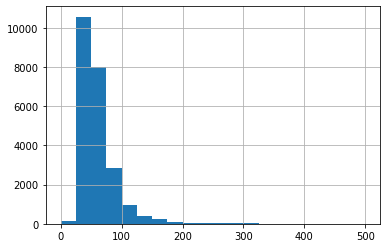

In [8]:
data.total_area.hist(bins=20,range=(0,500))
display(data['total_area'].max())# максимальная общая площадь

На гистрограмме `total_area` видно, что квартиры в основном до 100 кв.м. Выглядит правдободно, так же есть квартиры с площадью около 350 кв. метров. Вызвав max(), видим что самая большая площадь составляет 900 метров, оставим это значение, по сколько это может быть просто большой дом.

763000000

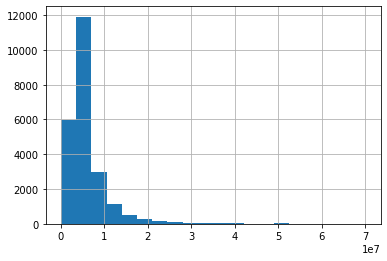

In [9]:
data.last_price.hist(bins=20,range=(0,70000000))
display(data['last_price'].max())
data_filtr = data.loc[data['last_price'] < 55000000]

На гистрограмме `last_price` отображены цены квартир, мы видим, что преобладают квартиры с ценой около 5 млн.рублей. А самая дорогая
квартира стоит 50 млн. рублей. Все что выше 55 млн. рублей будем считать выбросами. Дальше работаем с таблицой `data_filtr`

19

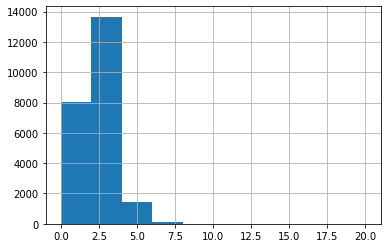

In [10]:
data_filtr.rooms.hist(bins=10,range=(0,20))
display(data_filtr['rooms'].max())# выведем максимальное число комнат

На гистрограмме `rooms` отображены кол-во комнат. Максимальное значение `19 комнат`, в теории это возможно, оставим это значение.</b>

<AxesSubplot:>

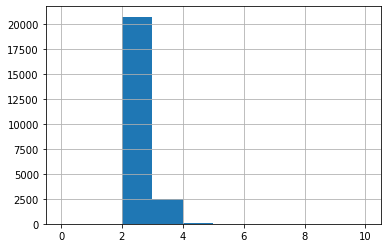

In [11]:
data_filtr.ceiling_height.hist(bins=10,range=(0,10))

Гистограмма `ceiling_height` выглядит правдоподобно, по сколько мы сами отрезали значения меньше 2.5 и больше 9

Для столбца `days_exposition` построим `boxplot()` и вызовем метод `describe()`, чтобы более подробно ознакомиться со значениями этого столбца

<AxesSubplot:>

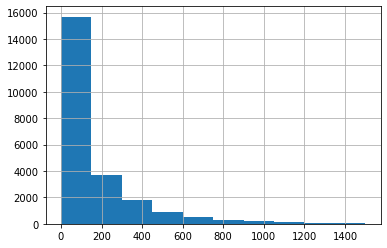

In [12]:
data_filtr.days_exposition.hist(bins=10,range=(0,1500))

count    23278.000000
mean       170.319787
std        206.925625
min          1.000000
25%         45.000000
50%         96.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

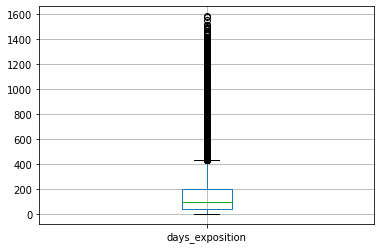

In [13]:
display(data_filtr['days_exposition'].describe())
data_filtr.boxplot('days_exposition')#построим boxplot(), чтобы посмотреть как распределены данные

### Вывод

Среднее время размещения объявлений - 170 дней, медиана - 96(в 2 раза меньше среднего). Это говорит о том, что в данных есть выбросы и это видно на  гистограмме. Хвост гистограммы растягивается до 1400, это подтверждает метод `describe()`, мы видим что максимальное значение 1580. В таком случае, если нас спросят среднее время продажи квартиры, то среднем временем будем считать медиану, она отображает более реальные цифры, чем среднее. Диаграмма размаха показывает, как медиана не стремится к верхней гриницы нормальных значений. То что не вошло в пределы нормальных значений будем считать выбросами(значения больше 550). Быструю продажу предлагаю считать от 0 до Q1, необычайно долгую от Q3 до 550.


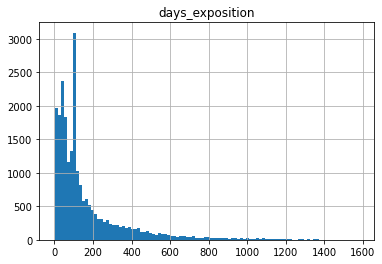

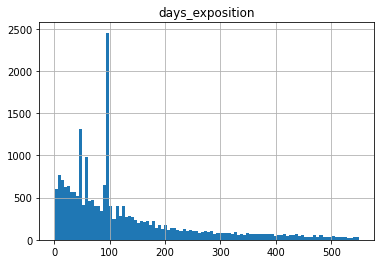

In [14]:
normal_values = data_filtr.query('days_exposition <= 550')
data_filtr.hist('days_exposition',bins=100)
plt.show()
normal_values.hist('days_exposition', bins=100)
plt.show()

### Вывод

Построили двсе гистрограммы: 

- Из старой data. 
- Из normal_values, которая удовлетворяет условию days_exposition <= 550

На гистрограмме normal_values обнаружены шумы и всплески. Скорее всего числа 45, 60 и 90 это сроки автоматического снятия объявления с публикации. Это не продажи.

Общее правило: чем данных меньше, тем шумнее гистрограмма.


Среднее время продажи квартиры: 128
Медианное время продажи квартиры: 96


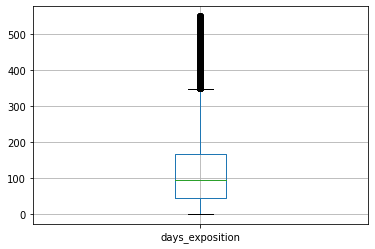

In [15]:
normal_values.boxplot('days_exposition')# строим диаграмму размаха из очищенной таблицы
print("Среднее время продажи квартиры:", round(normal_values['days_exposition'].mean()))
print("Медианное время продажи квартиры:", round(normal_values['days_exposition'].median()))

Будем считать, что обычное время продаджи квартиры составляет 100 дней(медиану). По сколько она точнее отображает выборку.
Предлагаю считать, что долго - это от Q3 до 350, а быстро от 0 до Q1.

Построим график, чтобы понять зависит ли стоимость от кол-ва комнат

<AxesSubplot:xlabel='last_price'>

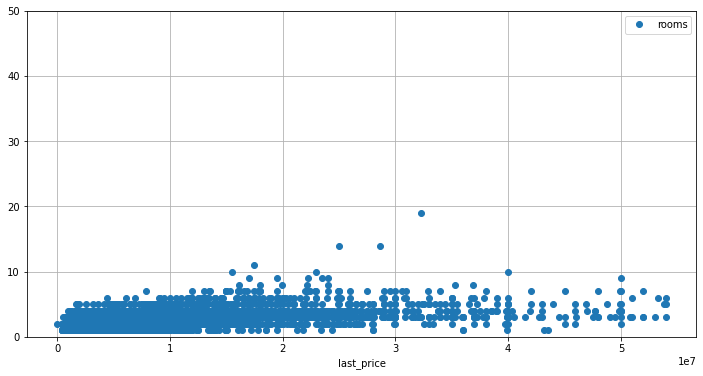

In [38]:
normal_values.plot(x='last_price',y='rooms',style='o', ylim=(0,50), grid=True,figsize=(12,6))

В целом нельзя сказать, что стоимость квартиры напрямую зависит от кол-ва комнат.

Построим график стоимости квартир по удаленности от центра

<AxesSubplot:xlabel='cityCenters_nearest'>

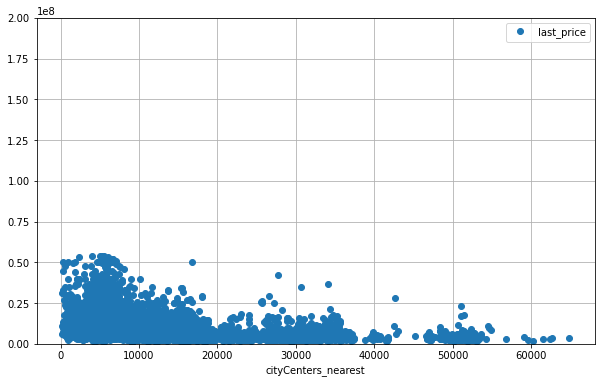

In [39]:
normal_values.plot(x='cityCenters_nearest',y='last_price',style='o', ylim=(0,200000000), grid=True,figsize=(10,6))
#display(normal_values.head(40))


На графике видно, как меняется цена в зависимости от удаленности от центра. Однозначно можно сказать, чем дальше от центра, дешевле квартира. Но недорогие квартиры в центре так же присутствуют.

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

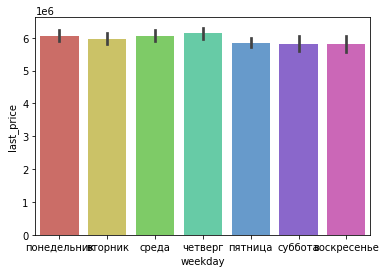

In [40]:
sns.barplot(x="weekday", 
            y="last_price",
            palette='hls', 
            order=['понедельник','вторник','среда','четверг','пятница','суббота','воскресенье'],
            data=normal_values)


<AxesSubplot:xlabel='year', ylabel='last_price'>

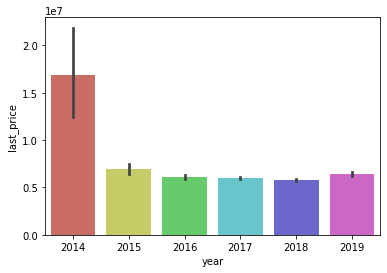

In [41]:
sns.barplot(x="year", 
            y="last_price",
            palette='hls', 
            data=normal_values)

<AxesSubplot:xlabel='month', ylabel='last_price'>

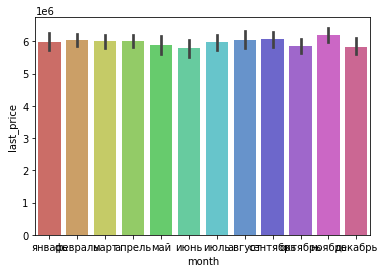

In [42]:
sns.barplot(x="month", 
            y="last_price",
            palette='hls',
            order=['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь'],
            data=normal_values)                                                           

<AxesSubplot:xlabel='distribution_clmn', ylabel='last_price'>

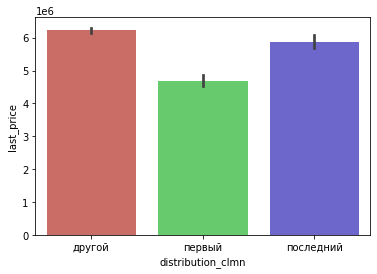

In [43]:
sns.barplot(x="distribution_clmn", 
            y="last_price",
            palette='hls',
            data=normal_values)

### Вывод

В график по годам в выборку попало около 30 квартир за 2014 год, их средняя цена составлят 16 миллионов рублей. 
Они искажают данные, при построение графика используем отрезок 2015-2019
    
Из графиков по дню недели, месяцу или году, нельзя сказать что цена зависит от этих факторов
    
Но на последнем графике видно, что цены на квартиры на первом этаже дешевле чем на последнем или другом


Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [44]:
display(normal_values['locality_name'].value_counts().head(10))

data_local = normal_values[normal_values['locality_name'].isin(['Санкт-Петербург','посёлок Мурино','посёлок Шушары','Всеволожск','Пушкин','Колпино','посёлок Парголово','Гатчина','деревня Кудрово','Выборг'])]
display(data_local)
display(data_local.pivot_table(index='locality_name',values='square_price',aggfunc='mean').sort_values(by='square_price',ascending=False))


Санкт-Петербург      14490
посёлок Мурино         470
посёлок Шушары         419
Всеволожск             362
Пушкин                 343
Колпино                325
посёлок Парголово      311
Гатчина                286
деревня Кудрово        257
Выборг                 223
Name: locality_name, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_price,weekday,year,month,distribution_clmn,living_ratio,kitchen_ratio,is_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,96.0,120370.370370,четверг,2019,март,другой,0.472222,0.231481,Other
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,81.0,82920.792079,вторник,2018,декабрь,первый,0.460396,0.272277,Other
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.0,121.0,100000.000000,вторник,2018,июнь,другой,0.320000,0.410000,Center
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,155.0,99195.710456,четверг,2017,ноябрь,другой,0.284182,0.386059,Other
7,5,7915000,71.60,2019-04-18,2,2.65,24,31.42,22,False,...,0.0,96.0,110544.692737,четверг,2019,апрель,другой,0.438827,0.263966,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23385,19,9200000,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,0.0,23.0,91089.108911,понедельник,2019,апрель,другой,0.623762,0.148515,Other
23386,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,652.0,29.0,100566.572238,среда,2018,февраль,другой,0.461756,0.257790,Other
23387,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,0.0,15.0,105769.230769,четверг,2018,июль,другой,0.596154,0.115385,Center
23388,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,806.0,519.0,129903.978052,четверг,2016,октябрь,другой,0.552812,0.145405,Center


,square_price
locality_name,
Санкт-Петербург,112151.614083
Пушкин,102881.544572
деревня Кудрово,92374.114551
посёлок Парголово,90035.190932
посёлок Мурино,85156.219460
посёлок Шушары,78390.022434
Колпино,75362.316152
Гатчина,68976.529739
Всеволожск,68680.996013


### Вывод

* Средняя цена квадратного метра топ-10 населенных пунктов выведена в pivot_table()
* Самое дорогое жилье в Санкт-Петербурге средняя цена за кв.м. = 112 151
* Жилье с самой низкой стоимость в Выборге средняя цена за кв.м. = 58 118

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр.

<AxesSubplot:xlabel='distance_to_center'>

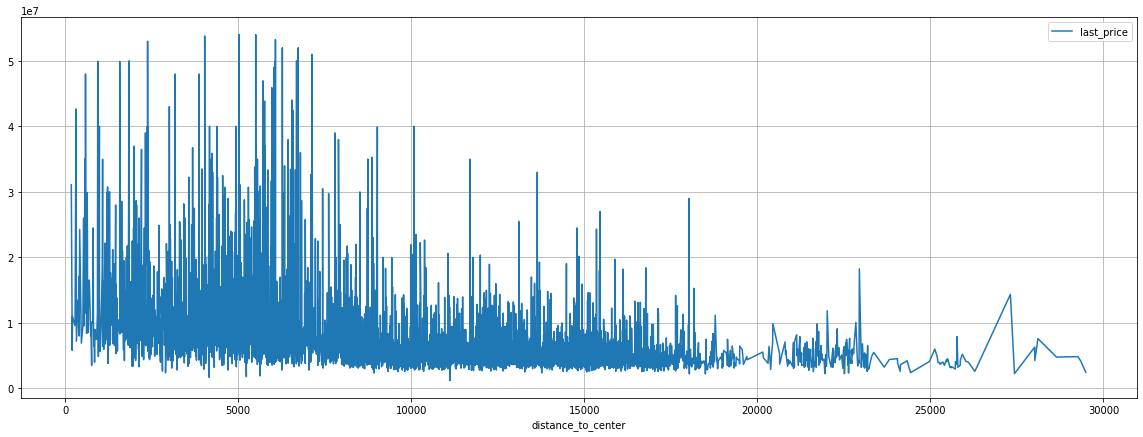

In [46]:
data_spb = normal_values[normal_values['locality_name'].isin(['Санкт-Петербург'])]
data_spb.dropna(subset=['cityCenters_nearest'], inplace=True)
data_spb['distance_to_center'] = data_spb['cityCenters_nearest'].astype('int')
(
data_spb
    .pivot_table(index='distance_to_center',values='last_price', aggfunc='mean') 
    .plot(grid=True, figsize=(20, 7))
)    

### Вывод

* Очистили данные от пропусков удалив их
* Сделали сводную табицу по цене километров 
* Построили график plot()

График меняется на расстояние 8 км.(перестают появляться пиковые значения). Будем считать, что от 0 до 8000м - это центр города.

<AxesSubplot:xlabel='square_price'>

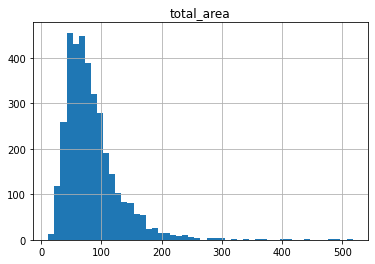

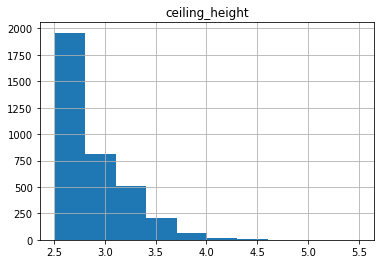

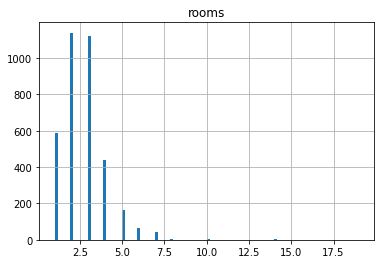

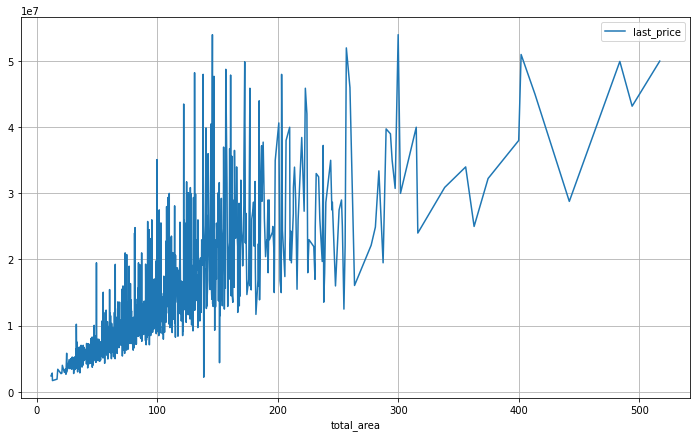

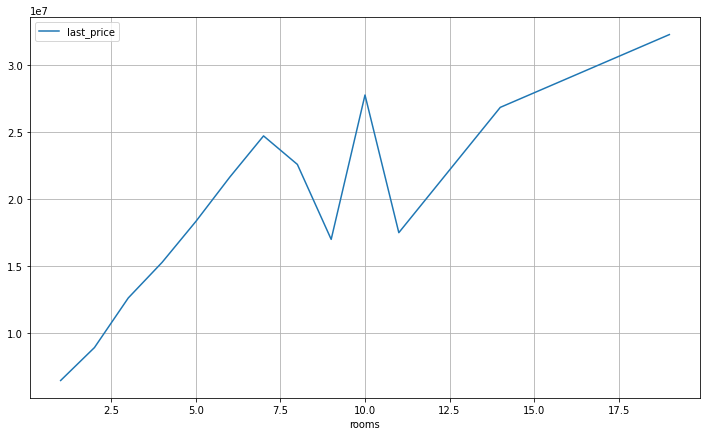

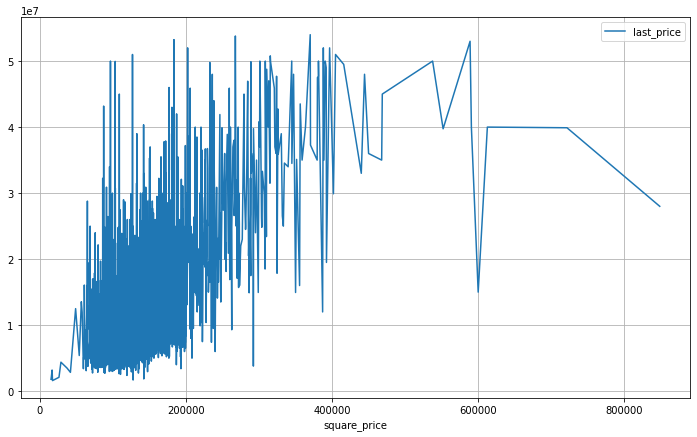

In [47]:
(#построим гистограму по столбцу площадь
data_spb
    .query('distance_to_center < 8500')
    .hist('total_area',bins=50,grid=True)
)    
(
data_spb
    .query('distance_to_center < 8500')
    .hist('ceiling_height') 
)
(
data_spb
    .query('distance_to_center < 8500')
    .hist('rooms', bins=100) 
)

(
data_spb
    .query('distance_to_center < 8500')
    .pivot_table(index='total_area',values='last_price',aggfunc='mean')
    .plot(grid=True, figsize=(12, 7))
)    
(
data_spb
    .query('distance_to_center < 8500')
    .pivot_table(index='rooms',values='last_price',aggfunc='mean')
    .plot(grid=True, figsize=(12, 7))
)    
(
data_spb
    .query('distance_to_center < 8500')
    .pivot_table(index='square_price',values='last_price',aggfunc='mean')
    .plot(grid=True, figsize=(12, 7))
)    



На данном графике ниже видно, что цена слабо зависит от дня недели публикации объявления.


<AxesSubplot:xlabel='last_price', ylabel='weekday'>

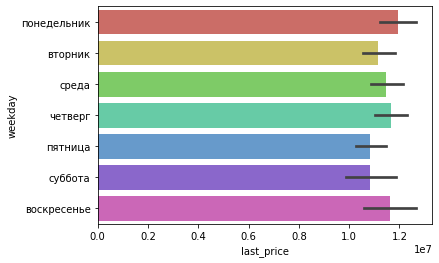

In [51]:
data_spb_new = data_spb.query('distance_to_center < 8500')
sns.barplot(x="last_price", 
            y="weekday",
            palette='hls', 
            order=['понедельник','вторник','среда','четверг','пятница','суббота','воскресенье'],
            data=data_spb_new)

Построим матрицу корреляции

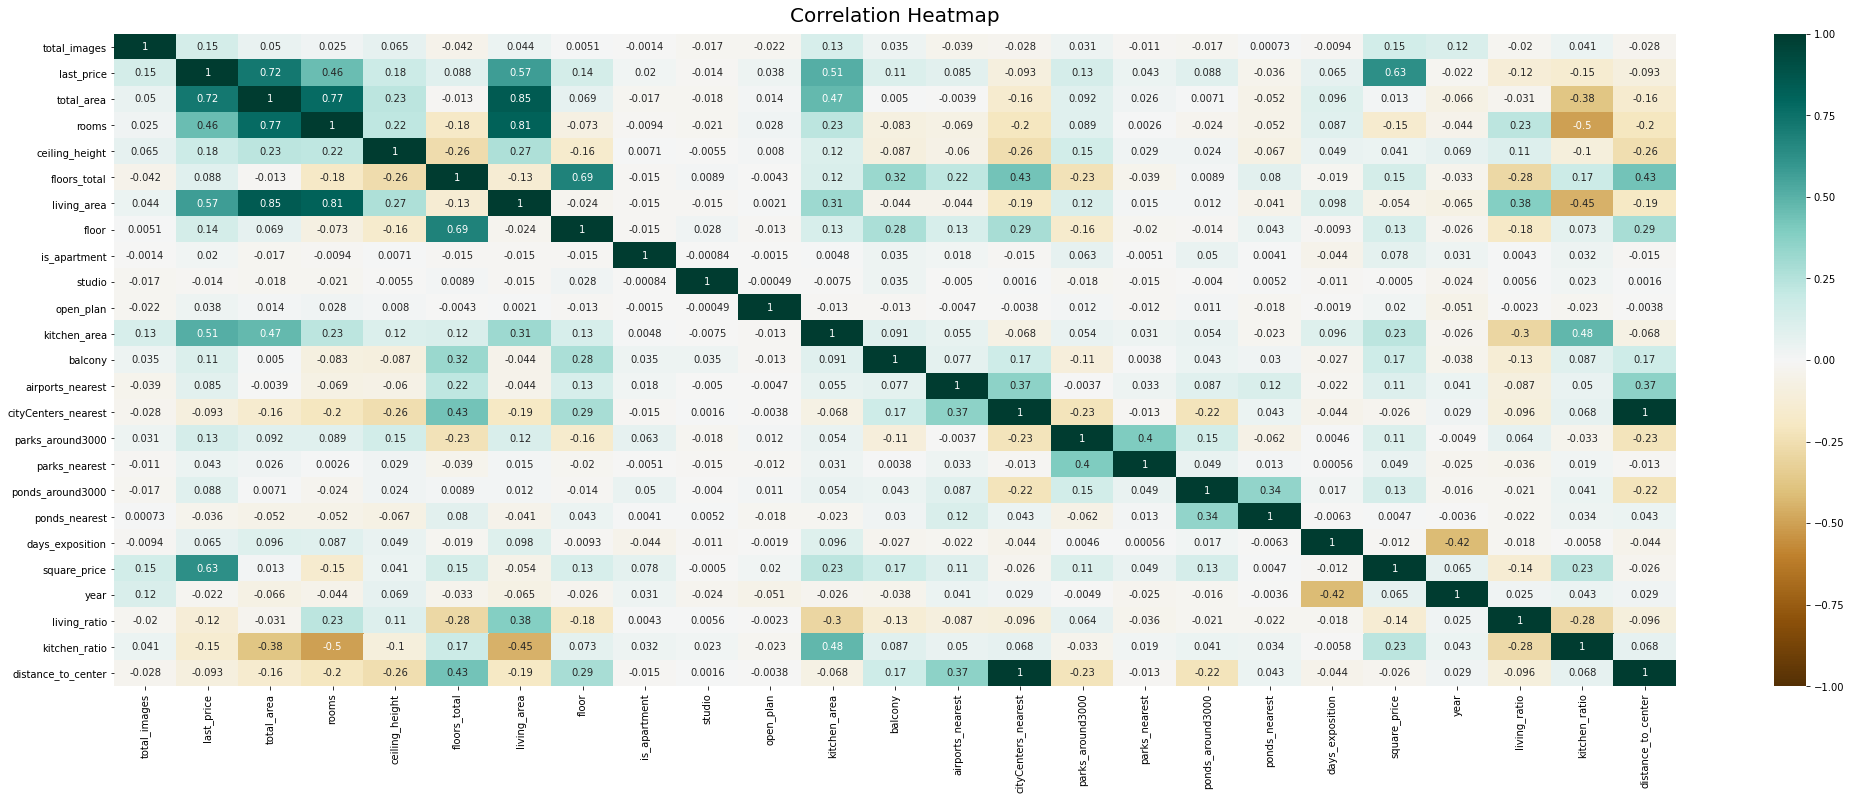

In [52]:
plt.figure(figsize=(35,12))
heatmap = sns.heatmap(data_spb_new.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

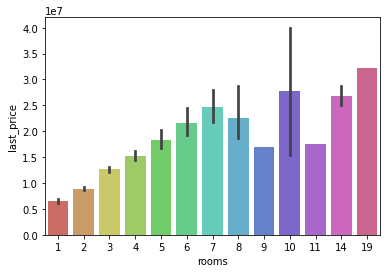

In [53]:
sns.barplot(x="rooms", 
            y="last_price",
            palette='hls', 
            data=data_spb_new)

На данном графике видно, что цена напрямую зависит от кол-ва комнат.


<AxesSubplot:xlabel='last_price', ylabel='month'>

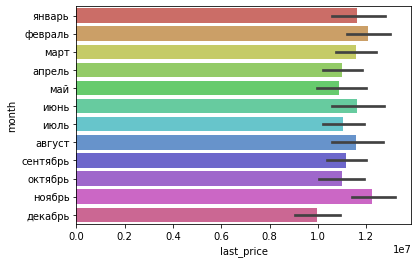

In [54]:
sns.barplot(x="last_price", 
            y="month",
            palette='hls',
            order=['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь'],
            data=data_spb_new) 

На данном графике видно, что цены на жилье дешевле в декабре, а дороже всего в ноябре.

<AxesSubplot:xlabel='distribution_clmn', ylabel='last_price'>

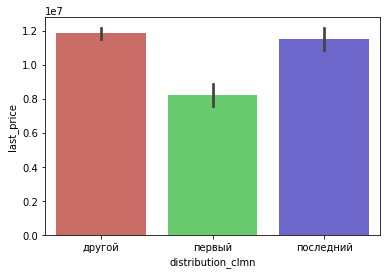

In [30]:
sns.barplot(x="distribution_clmn", 
            y="last_price",
            palette='hls',
            data=data_spb_new)

Подтверждаются данные по всей таблице, цены на первом этаже дешевле, чем цены на других этажах.


<AxesSubplot:xlabel='year', ylabel='last_price'>

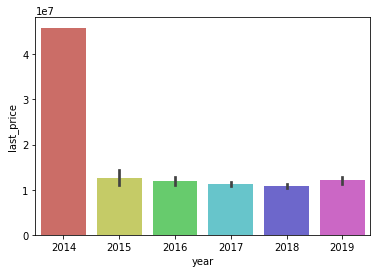

In [31]:
sns.barplot(x="year", 
            y="last_price",
            palette='hls',
            data=data_spb_new)

In [32]:
normal_values['is_center']=np.where(normal_values.index.isin(data_spb_new.index), 'Center', 'Other') # Добавим метку центра.
display(normal_values.head())



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_price,weekday,year,month,distribution_clmn,living_ratio,kitchen_ratio,is_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,96.0,120370.370370,четверг,2019,март,другой,0.472222,0.231481,Other
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,81.0,82920.792079,вторник,2018,декабрь,первый,0.460396,0.272277,Other
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,вторник,2018,июнь,другой,0.320000,0.410000,Center
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,55.0,95065.789474,понедельник,2018,сентябрь,другой,0.473684,0.299342,Other
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0.0,155.0,99195.710456,четверг,2017,ноябрь,другой,0.284182,0.386059,Other


<AxesSubplot:xlabel='year', ylabel='last_price'>

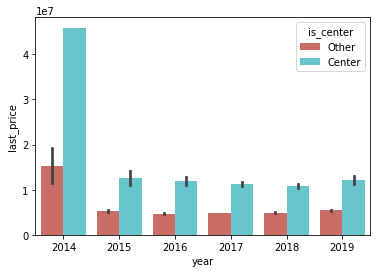

In [33]:
sns.barplot(x="year", 
            y="last_price",
            hue='is_center',
            palette='hls',
            data=normal_values)

Видно, что цены идут на спад до 2018 года, дальше цена поднимается. 2014 год не берем во внимание, по сколько там мало данных(вывод из графика по всей таблице)

<AxesSubplot:xlabel='distance_to_center'>

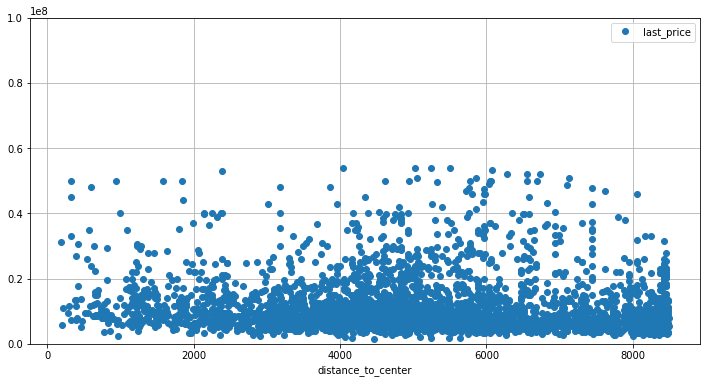

In [55]:
data_spb_new.plot(x='distance_to_center',
                  y='last_price',style='o',
                  ylim=(0,100000000), grid=True,figsize=(12,6))

Цена квартир в центре слабо зависит от расстояния до центра(мы и так взяли квартиры, которые находятся в самом центре).

### Вывод

* Самые популярные квартиры - квартиры площадью до 100 метров, после отметки 100 кв.м. график идет на спад до 600 метров(это видно на первом графике)
* Высота потолков в центре от 2.5 метров до 5 метров. 
* Преобладают 2 и 3 комнатные квартиры, но есть 5,6 и 7 комнатные квартиры
* На графике видно, чем больше площадь тем дороже квартира
* Стоимость зависит от числа комнат, так же нашли 12 комнатную квартиру, которая стоит гораздо дороже всех остальных
* Цена не зависит от даты размещения, потому что пиковые значения дорогих квартир встречаются из года в год, но есть средняя масса. Можно сказать, что стоимость квартир не менялась за этот период.
* Удаленность от центра не коррелирует со стоимость, потому что мы и так взяли квартиры которые находятся в центре города.
* Стоимость квартиры положительно коррелирует на стоимость жилья, это видно на графике и матрице корреляции. 
На всех графиках видны аномальные значения в хвостах это может быть связано с тем, что жилье в центре бывает необычайно дорогим(напрпимер из-за дизайнерского ремонта


## Общий вывод

* В данных нашли много выбросов и удалили их условием data.query('days_exposition <= 550')
* Средняя цена квадртаного метра в data 99 345, а медиана 94 895
* Обычно продажа квартиры длится 96 дней, дольше всего квартира продавалась 1580 дней.
* Цена квадратного метро однозначно коррелирует со стоимость квартиры
* Больше всего квартир продается в Санкт-Петербурге - 12514
* В данных преобладают квартиры общей площадью от 50 до 100 кв. метров
* Цена квартиры зависит от площади, чем больше площадь, тем дороже квартира
